# Visualize segments and compare it to fragments

## Set environment

In [1]:
suppressMessages(suppressWarnings(source("config.R")))

## Import counts of fragments and segments

In [7]:
### set column names and types
cnames = c("Chrom", "Start", "End", "Count")
ctypes = c(col_character(), col_double(), col_double(), col_double())
    
### import fragments
fpath = "/data/reddylab/Kuei/out/CombEffect_STARR/count_fragment/TFX_Dex/cnt_PER1.bed"
dat_frag = read_tsv(
    fpath, 
    col_names = cnames, 
    col_types = ctypes)

### set column names and types
cnames = c("Chrom", "Start", "End")
ctypes = c(col_character(), col_double(), col_double())

### import segments
fpath = "/data/reddylab/Kuei/out/CombEffect_STARR/count_segment/TFX_Dex/seg_PER1.bed"
dat_seg = read_tsv(
    fpath, 
    col_names = cnames, 
    col_types = ctypes)

In [8]:
head(dat_frag)

Chrom,Start,End,Count
chr17,8148987,8150011,1
chr17,8148987,8150013,1
chr17,8148987,8150014,2
chr17,8148987,8150015,3
chr17,8148988,8150014,1
chr17,8148988,8150015,1


In [9]:
head(dat_seg)

Chrom,Start,End
chr17,8148987,8148988
chr17,8148988,8149016
chr17,8149016,8149018
chr17,8149018,8149019
chr17,8149019,8149023
chr17,8149023,8149029


In [16]:
dat = dat_frag
dat = dat %>% mutate(idx=1:nrow(dat)) %>% mutate(d=End-Start)
dat %>% head

Chrom,Start,End,Count,idx,d
chr17,8148987,8150011,1,1,1024
chr17,8148987,8150013,1,2,1026
chr17,8148987,8150014,2,3,1027
chr17,8148987,8150015,3,4,1028
chr17,8148988,8150014,1,5,1026
chr17,8148988,8150015,1,6,1027


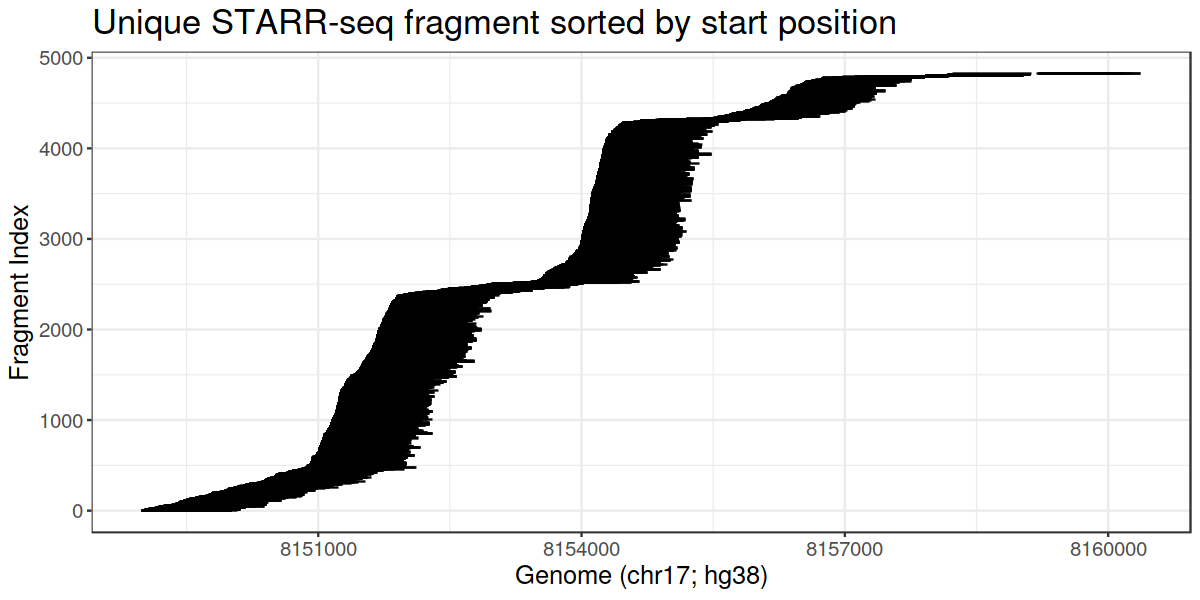

In [17]:
options(repr.plot.height=5, repr.plot.width=10)

gpt = ggplot(dat, aes(x=Start, xend=End, y=idx, yend=idx)) 
gpt = gpt + 
    geom_segment() + 
    labs(x="Genome (chr17; hg38)", 
         y="Fragment Index", 
         title="Unique STARR-seq fragment sorted by start position") +
    theme_bw() +
    theme(
        title      = element_text(size=17),
        axis.title = element_text(size=15),
        axis.text  = element_text(size=12)
    )
gpt

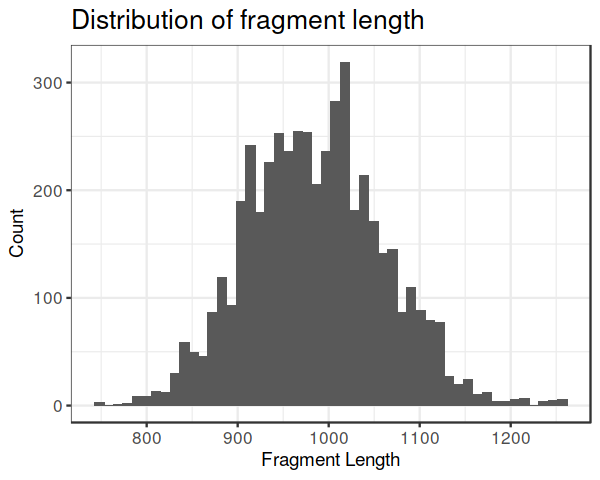

In [18]:
options(repr.plot.height=4, repr.plot.width=5)

gpt = ggplot(dat, aes(x=d)) + 
    geom_histogram(bins = 50) + 
    labs(x="Fragment Length", 
         y="Count", 
         title="Distribution of fragment length") +
    theme_bw() +
    theme(
        title      = element_text(size=13),
        axis.title = element_text(size=11),
        axis.text  = element_text(size=10)
    )
gpt

In [19]:
dat = dat_seg
dat = dat %>% mutate(idx=1:nrow(dat)) %>% mutate(d=End-Start)
dat %>% head

Chrom,Start,End,idx,d
chr17,8148987,8148988,1,1
chr17,8148988,8149016,2,28
chr17,8149016,8149018,3,2
chr17,8149018,8149019,4,1
chr17,8149019,8149023,5,4
chr17,8149023,8149029,6,6


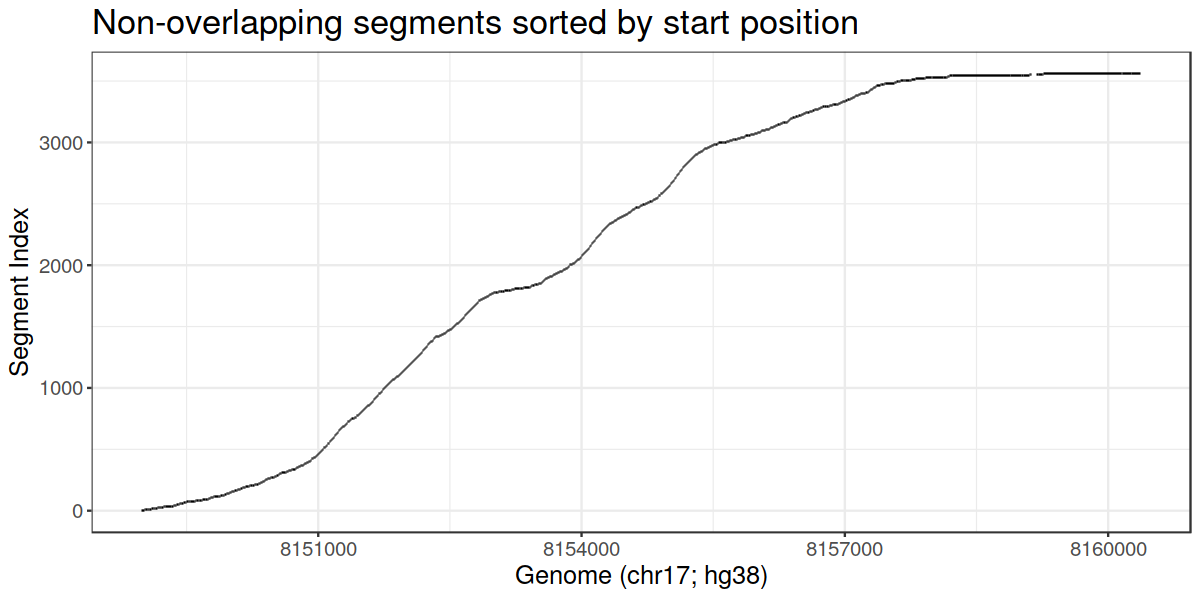

In [20]:
options(repr.plot.height=5, repr.plot.width=10)

gpt = ggplot(dat, aes(x=Start, xend=End, y=idx, yend=idx)) 
gpt = gpt + 
    geom_segment() + 
    labs(x="Genome (chr17; hg38)", 
         y="Segment Index", 
         title="Non-overlapping segments sorted by start position") +
    theme_bw() +
    theme(
        title      = element_text(size=17),
        axis.title = element_text(size=15),
        axis.text  = element_text(size=12)
    )
gpt

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 22 rows containing missing values (geom_bar).”

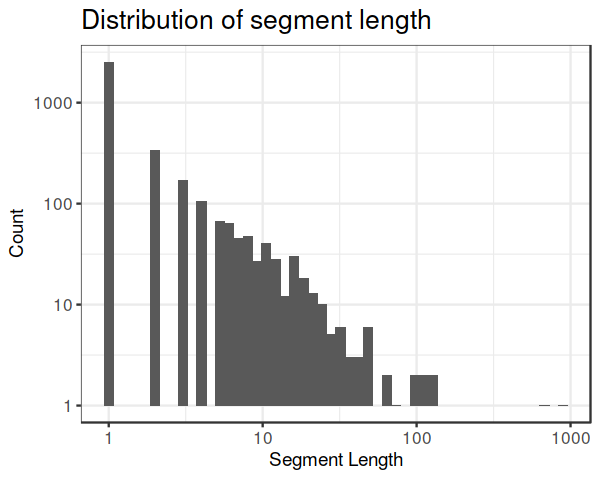

In [21]:
options(repr.plot.height=4, repr.plot.width=5)

gpt = ggplot(dat, aes(x=d)) + 
    geom_histogram(bins = 50) + 
    scale_y_log10() + 
    scale_x_log10() +
    labs(x="Segment Length", 
         y="Count", 
         title="Distribution of segment length") +
    theme_bw() +
    theme(
        title      = element_text(size=13),
        axis.title = element_text(size=11),
        axis.text  = element_text(size=10)
    )
gpt